In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data_path='../data/KGHM_clear.csv'

In [3]:
df=pd.read_pickle(data_path)

In [4]:
df.head()

,Name,Date,Open,High,Low,Close,Volume,TimeDelta,CoursChange,LowHighDiff,OpenCloseDiff
0,KGHM,2000-11-17 10:00:24,26.3,26.3,26.3,26.3,10840,0.0,NaN,0.0,0.0
1,KGHM,2000-11-17 10:00:25,26.3,26.3,26.3,26.3,1035,1.0,0.0,0.0,0.0
2,KGHM,2000-11-17 10:00:26,26.3,26.3,26.3,26.3,57,1.0,0.0,0.0,0.0
3,KGHM,2000-11-17 10:03:29,26.3,26.3,26.3,26.3,20288,183.0,0.0,0.0,0.0
4,KGHM,2000-11-17 10:09:28,26.2,26.2,26.2,26.2,9,359.0,-0.1,0.0,0.0


In [5]:
df_part=df.loc[:100,:]

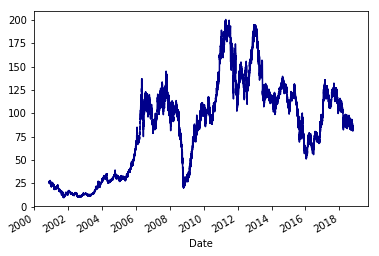

In [6]:
ax1 = df.plot(x='Date',y='Open',c='DarkBlue',legend=False)

This method is very slow

In [7]:
# import matplotlib.pyplot as plt
# plt.plot(df['Date'], df['Open'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.

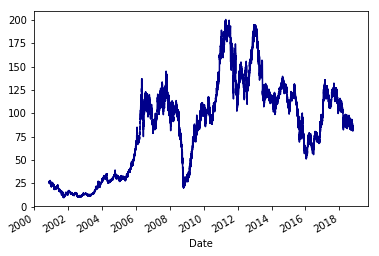

In [8]:
ax1 = df.plot(x='Date',y='Open',c='DarkBlue',legend=False)

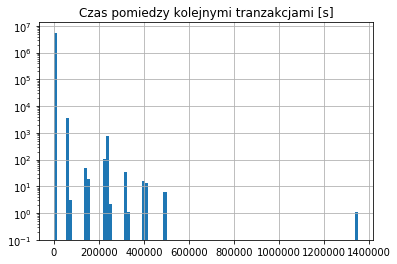

In [9]:
fig, ax = plt.subplots()
df.TimeDelta.hist(ax=ax, bins=100, bottom=0.1,)
ax.set_title("Czas pomiedzy kolejnymi tranzakcjami [s]")
ax.set_yscale('log')
plt.show()

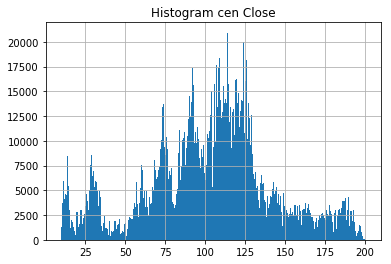

In [10]:
fig,ax2=plt.subplots()
df.Close.hist(ax=ax2, bins=1000, bottom=0.1)
ax2.set_title("Histogram cen Close")
# ax2.set_yscale('log')
plt.show()

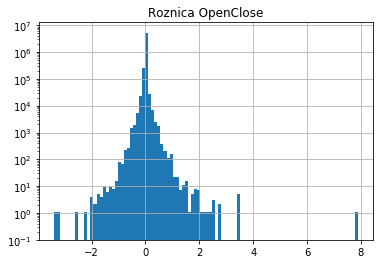

In [11]:
fig,ax2=plt.subplots()
df.OpenCloseDiff.hist(ax=ax2, bins=100, bottom=0.1)
ax2.set_title("Roznica OpenClose")
ax2.set_yscale('log')
plt.show()

In [12]:
df.OpenCloseDiff.sum()

2198.369999999989

In [13]:
df.LowHighDiff.sum()

51128.67000000006

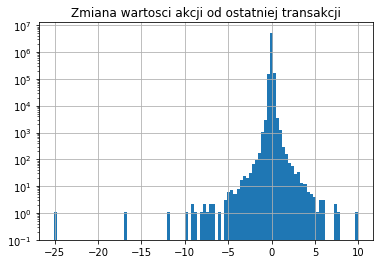

In [14]:
fig, ax = plt.subplots()
df.CoursChange.hist(ax=ax,bins=100, bottom=0.1)

# series.hist( bins=100, bottom=0.1)
ax.set_yscale('log')
ax.set_title('Zmiana wartosci akcji od ostatniej transakcji')
plt.show()

In [15]:
df[["CoursChange","TimeDelta"]].corr()

,CoursChange,TimeDelta
CoursChange,1.000000,0.034598
TimeDelta,0.034598,1.000000


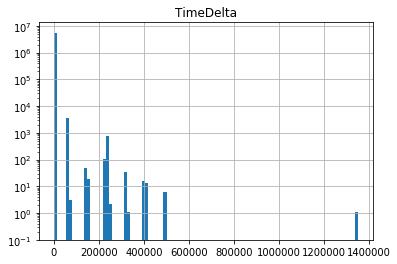

In [16]:
fig, ax = plt.subplots()
df.TimeDelta.hist(ax=ax,bins=100, bottom=0.1)

# series.hist( bins=100, bottom=0.1)
ax.set_yscale('log')
ax.set_title('TimeDelta')
plt.show()

Jak widać, korelacja jest bardzo mała. Modele liniowe mogą działać słabo

Zdecydowana większość zmian czasu i kursu jest bliska zeru

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #for offline ploting 
# init_notebook_mode(connected=True)

x = df.TimeDelta
data = [go.Histogram(x=x,
                     autobinx = False,xbins={'end':600, 'size':1, 'start':0}
    )]

In [20]:
layout = go.Layout(
#     title='Sampled Results',
    yaxis=dict(
        title='Probability'
    ),
    xaxis=dict(
        title='CourseChange'
    ),
    bargap=0.2,
    bargroupgap=0.1
)

fig=go.Figure(data=data,layout=layout)
py.iplot(fig, filename='TimeDeltaCDF')

/home/filip/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [21]:
x = df[200000:df.CoursChange.shape[0]].CoursChange
data = [go.Histogram(x=x,
                     cumulative=dict(enabled=True),histnorm='probability',autobinx = False,xbins={'end':6.015, 'size':0.005, 'start':-4}
    )]

In [22]:
layout = go.Layout(
#     title='Sampled Results',
    yaxis=dict(
        title='Probability'
    ),
    xaxis=dict(
        title='CourseChange'
    ),
    bargap=0.2,
    bargroupgap=0.1
)

fig=go.Figure(data=data,layout=layout)
py.iplot(fig, filename='CoursChangeCDF')

/home/filip/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



PlotlyRequestError: 
<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>502 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>


# Wykres swiecowy dla akcji KGHM

In [21]:
fig = py.get_figure("https://plot.ly/~Moribund7/4/")
iplot(fig)

NameError: name 'iplot' is not defined

In [30]:
df[df["TimeDelta"]>800000].index

Int64Index([3371820], dtype='int64')

In [31]:
df.iloc[3371819]

Name                            KGHM
Date             2014-01-15 17:04:08
Open                          113.75
High                          113.75
Low                           113.75
Close                         113.75
Volume                          2816
TimeDelta                          6
CoursChange                        0
LowHighDiff                        0
OpenCloseDiff                      0
Name: 3371819, dtype: object

In [32]:
df.iloc[3371820]

Name                            KGHM
Date             2014-01-31 09:00:01
Open                           108.9
High                           108.9
Low                            108.9
Close                          108.9
Volume                          3996
TimeDelta                1.35335e+06
CoursChange                    -4.85
LowHighDiff                        0
OpenCloseDiff                      0
Name: 3371820, dtype: object

Anomalia pomiędzy 2014-01-31 09:00:01 a  2014-01-15 17:04:08 . Brak danych przez 15 dni

In [33]:
df[df["OpenCloseDiff"]>4]

,Name,Date,Open,High,Low,Close,Volume,TimeDelta,CoursChange,LowHighDiff,OpenCloseDiff
4901662,KGHM,2017-01-27 09:00:01,121.0,121.0,113.1,113.1,55437,57312.0,-1.05,7.9,7.9


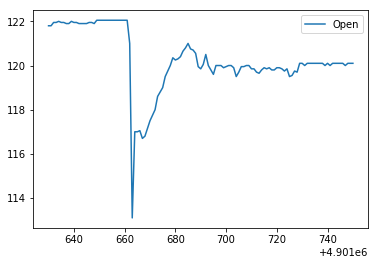

In [34]:
df.loc[4901630:4901750][["Open"]].plot()

Dziwna zmiana ceny, notowania z poprzedniego dnia się urywają, duże różnice pomiędzy low and high

# Proba prognozowania

In [ ]:
df=pd.read_pickle(data_path)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm

In [ ]:
df.head()

In [ ]:
df=df[['Close','TimeDelta']]

In [ ]:
df.head(15)

In [ ]:
df.shape

In [ ]:
data_size=5000000

In [ ]:
forecast_out=10

In [ ]:
df_test=df[data_size-5:data_size+forecast_out]

In [ ]:
df=df[:data_size]

In [ ]:
df.tail()

In [ ]:
df_test

In [ ]:
df['PredictionPrice'] = df[['Close']].shift(-forecast_out)
df['PredictionTime'] = df[['TimeDelta']].shift(-forecast_out)

In [ ]:
df.tail(15)

In [ ]:
# X = np.array(df.drop(['PredictionPrice',"PredictionTime"], 1))
X = np.array(df.drop(['PredictionPrice',"PredictionTime","TimeDelta"], 1))


In [ ]:
X

In [ ]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X
X.shape

In [ ]:
X.shape

In [ ]:
X_forecast.shape

In [ ]:
# y = np.array(df[['PredictionPrice',"PredictionTime"]])
y =  np.array(df.drop(['Close',"PredictionTime","TimeDelta"], 1))
y = y[:-forecast_out]

In [ ]:
y.shape

In [ ]:
X

In [ ]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

In [ ]:
normalized_X = preprocessing.scale(X)

In [ ]:
normalized_y = preprocessing.scale(y)

In [ ]:
print(normalized_y.shape,normalized_X.shape)

In [ ]:
normalized_X

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(normalized_X, normalized_y, test_size = 0.2, shuffle=False)

In [ ]:
X_train,y_train

In [ ]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

In [ ]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

In [ ]:
X_forecast

In [ ]:
df_test

Na podstwie ostatnich 5 przewidzieć kolejną jedna -- wejsscie to deltta t i zmiana kursu

Dane zrobic w fromie 5 danych i wynik , potemm je poshuflowac
wyrzucic zmiany dluzsze niz dzien
mozna zsporbowac dane gdzie nic sie nie zmienilo tez wyrzucic 